In [1]:
print('hi')

hi


In [2]:
!pwd

/Users/p/Documents/GitHub/VIRAT/analysis


In [3]:
!ls ../data

coco.names     yolov3.cfg     yolov3.weights


In [4]:
import numpy as np
import pandas as pd
import cv2 as cv
import time

In [5]:
# Load YOLO network model from harddisk
net = cv.dnn.readNetFromDarknet('../data/yolov3.cfg', '../data/yolov3.weights')
net.setPreferableBackend(cv.dnn.DNN_BACKEND_OPENCV)

In [6]:
# YOLO NN has 254 components. U can print them
ln = net.getLayerNames()
print(len(ln), ln)

254 ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'le

In [7]:
# Turn image into a blob
img = cv.imread('../images/000001_20654.jpg')
blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

In [8]:
blob.shape

(1, 3, 416, 416)

In [9]:
# show blob
r = blob[0,0,:,:]

cv.imshow('blob', r)
text = f'Blob shape={blob.shape}'
cv.waitKey(5000)

cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1);

(1, 3, 416, 416)


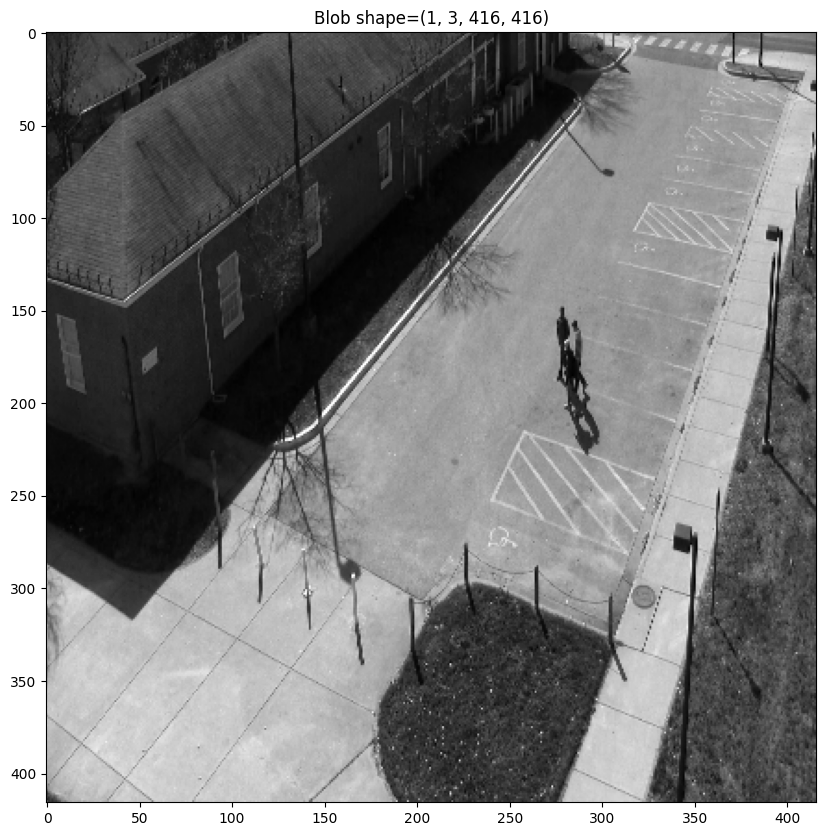

In [24]:
import cv2 as cv
import matplotlib.pyplot as plt

# Turn image into a blob
img = cv.imread('../images/000001_20654.jpg')
blob = cv.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

print(blob.shape)  # (1, 3, 416, 416)

# show blob
r = blob[0,0,:,:]

# Use matplotlib to display the image
plt.figure(figsize=(10,10)) # Set the size of the figure
plt.imshow(r, cmap='gray') # Display the image using a grayscale colormap
plt.title(f'Blob shape={blob.shape}') # Set the title of the figure
plt.show() # Show the plot

In [11]:
# run blob through NN
net.setInput(blob)
outputs = net.forward(ln)

print(len(outputs))
for out in outputs:
    print(out.shape)


254
(1, 32, 416, 416)
(1, 32, 416, 416)
(1, 32, 416, 416)
(1, 64, 208, 208)
(1, 64, 208, 208)
(1, 64, 208, 208)
(1, 32, 208, 208)
(1, 32, 208, 208)
(1, 32, 208, 208)
(1, 64, 208, 208)
(1, 64, 208, 208)
(1, 64, 208, 208)
(1, 64, 208, 208)
(1, 128, 104, 104)
(1, 128, 104, 104)
(1, 128, 104, 104)
(1, 64, 104, 104)
(1, 64, 104, 104)
(1, 64, 104, 104)
(1, 128, 104, 104)
(1, 128, 104, 104)
(1, 128, 104, 104)
(1, 128, 104, 104)
(1, 64, 104, 104)
(1, 64, 104, 104)
(1, 64, 104, 104)
(1, 128, 104, 104)
(1, 128, 104, 104)
(1, 128, 104, 104)
(1, 128, 104, 104)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 128, 52, 52)
(1, 128, 52, 52)
(1, 128, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 128, 52, 52)
(1, 128, 52, 52)
(1, 128, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 128, 52, 52)
(1, 128, 52, 52)
(1, 128, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 256, 52, 52)
(1, 128, 52, 52)
(1, 128, 52, 52)
(1,

In [12]:
pred = outputs[-1]

In [13]:
# get prediction values where something is predicted > 0.001
a_list = []
for i in range(len(pred)):
    for j in range(5, 85):
        if pred[i][j] > 0.001:
            a_list.append(i)

In [14]:
a_list

[3379, 3382, 3538, 4165]

In [15]:
# Show when something was actually predicted
new_outputs = pred[a_list]
new_outputs.shape

(4, 85)

In [16]:
classes = open('../data/coco.names').read().strip().split('\n')

In [17]:
def trackbar2(x):
    confidence = x/100
    r = r0.copy()
    for output in np.vstack(new_outputs):
        if output[4] > confidence:
            x, y, w, h = output[:4]
            p0 = int((x-w/2)*416), int((y-h/2)*416)
            p1 = int((x+w/2)*416), int((y+h/2)*416)
            cv.rectangle(r, p0, p1, 1, 1)
    text = f'Bbox confidence={confidence}'
    cv.imshow(text, r)
    cv.waitKey(5000)
    cv.destroyAllWindows()
    cv.waitKey(1)
    cv.waitKey(1)
    cv.waitKey(1)
    cv.waitKey(1);

In [18]:
r0 = blob[0, 0, :, :]
r = r0.copy()
cv.imshow('blob', r)
cv.createTrackbar('confidence', 'blob', 5, 101, trackbar2)
trackbar2(5)

In [19]:
boxes = []
confidences = []
classIDs = []
h, w = img.shape[:2]



In [20]:
for i in new_outputs:
    print(i[5:])

[0.27451694 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
[0.28439915 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.       

In [26]:
# display image with bounding boxes

for detection in new_outputs:
    scores = detection[5:]
    classID = np.argmax(scores)
    confidence = scores[classID]
    if confidence > 0.05:
        box = detection[:4] * np.array([w, h, w, h])
        (centerX, centerY, width, height) = box.astype("int")
        x = int(centerX - (width / 2))
        y = int(centerY - (height / 2))
        box = [x, y, int(width), int(height)]
        boxes.append(box)
        confidences.append(float(confidence))
        classIDs.append(classID)

indices = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
if len(indices) > 0:
    for i in indices.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in colors[classIDs[i]]]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
        cv.putText(img, text, (x, y - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

cv.imshow('window', img)
cv.waitKey(3000)
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1);

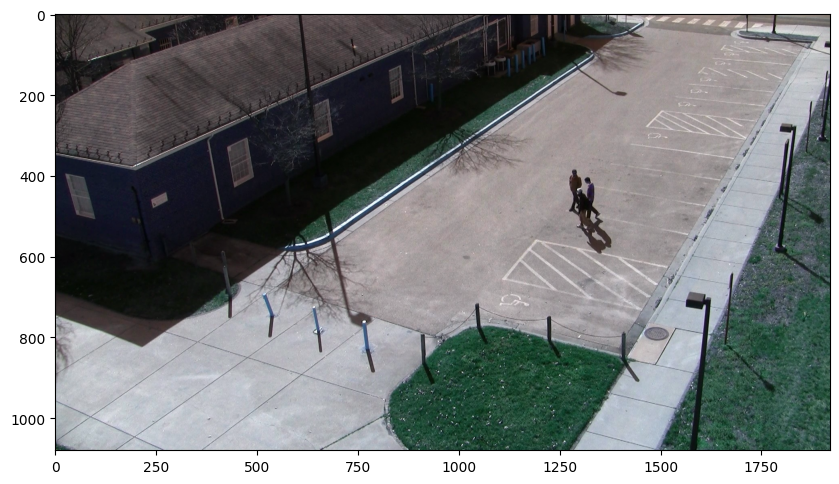

In [25]:
# display image with bounding boxes

for detection in new_outputs:
    scores = detection[5:]
    classID = np.argmax(scores)
    confidence = scores[classID]
    if confidence > 0.05:
        box = detection[:4] * np.array([w, h, w, h])
        (centerX, centerY, width, height) = box.astype("int")
        x = int(centerX - (width / 2))
        y = int(centerY - (height / 2))
        box = [x, y, int(width), int(height)]
        boxes.append(box)
        confidences.append(float(confidence))
        classIDs.append(classID)

indices = cv.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
if len(indices) > 0:
    for i in indices.flatten():
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        color = [int(c) for c in colors[classIDs[i]]]
        cv.rectangle(img, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(classes[classIDs[i]], confidences[i])
        cv.putText(img, text, (x, y - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)


plt.figure(figsize=(10,10)) # Set the size of the figure
plt.imshow(img, cmap='gray') # Display the image using a grayscale colormap
plt.show() # Show the plot